Deborah Aloisi

249948

# Exercise 1

Use simulation to prove Chebyshev’s inequality for a Poisson random variable of parameter λ = 15. What do you observe for λ = 1 instead?


Define function for pmf sampling method for sampling from a poisson and check if it works right so we plot the histogram of the result.

The first exercise was about proving Chebyshev’s inequality for a Poisson random variable.


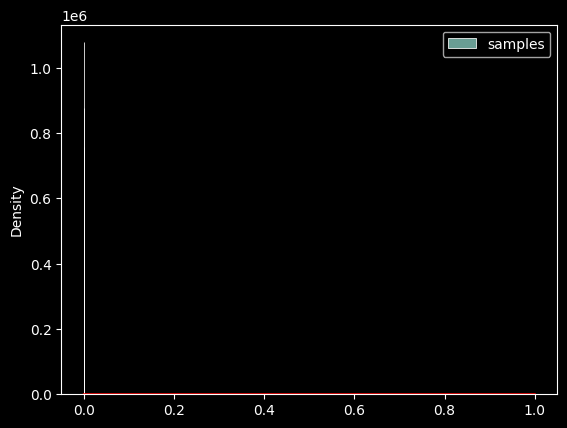

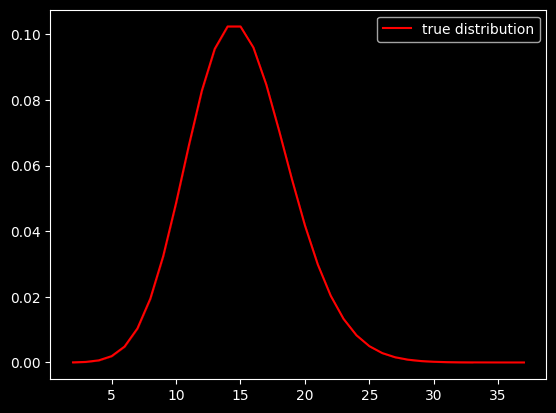

In [85]:
import numpy as np
import seaborn as sns
import scipy.stats as st
import matplotlib.pyplot as plt
import math

# class ValueOutOfRange(Exception):
#     pass

## FUNCTIONS ---------------------------------------------------------
#for generating number of a poisson distribution
def poiss_pmf(i:float, l:float):
    return np.power(l, i)*np.exp(-l)/math.factorial(int(i))


def chebyshev_inequality(k, mu, sigma, sample_size):#, fig, idx, col):
    # P(|X-μ| >= kσ) <= 1/k**2where 
    #X is the random variable
    #μ is population mean 
    #σ is standard deviation 
    #k is number of standard deviations from the mean
    probs = 0
    c = 0
    for i in poisson_samples:
        # count if far from mean in k standard deviation
        if abs(i - mu) >= k * sigma :
            c += 1
    # count divided by number of sample
    probs = c/sample_size
    if not probs <= (1/(k ** 2)):
        return  False
    else:
        return probs


## DATA -------------------------------------------------------------
l = 15
sample_size = 100000
mu = l
sigma = np.sqrt(l)


#generate numbers from seed 42
gen = np.random.default_rng(seed=42)
samples = gen.uniform(size=sample_size)
samples.sort()

#create a poiss samples list passing the number generated to the poiss_pmf function
poisson_samples = []
for s in samples:
    poisson_samples.append(poiss_pmf(s, l))

#plt.plot(samples, poisson_samples)


## GRAPH ------------------------------------------------------------
#check with graph
x = np.linspace(0, 1, sample_size) 
f, ax = plt.subplots(1)
sns.histplot(samples, stat="density", ax=ax, label="samples")
sns.lineplot(x=x, y=1, ax=ax, color="red")
ax.legend(loc="upper right")


#crate a poisson distribution to compare to my poisson dist. pmf
x = st.poisson.rvs(mu=l, size=sample_size)

#plot both distribution to see the difference in my formula
f, ax = plt.subplots(1)
#sns.histplot(poisson_samples, stat="density", ax=ax, label="sample distribution")
sns.lineplot(x=x, y=st.poisson.pmf(x,l), color="red", ax=ax, label="true distribution")
ax.legend(loc="best")




    

#-----------------------------------


# set k
ks = [0.1,0.5,1.0,1.5,2.0,2.5,3.0]
pk = []
for k in ks: 
    result = chebyshev_inequality(k, mu, sigma, sample_size)
    if not False:
        pk.append(result)

    



In [ ]:
#po = st.poisson(l)
#x = np.arange(st.poisson.ppf(0.01,l), st.poisson.ppf(0.99,l))



# #graph
# # set figure size
# plt.figure(figsize=(20,10))
# # plot each probability
# plt.plot(ks,data='result', marker='o')
# # show plot
# plt.show()# print each probability
# print("Probability of a sample far from mean more than k standard deviation:")
# for i, res in enumerate(result):
#     print("k:" + str(ks[i]) + ", probability: " \
#           + str(result)[0:5] + \
#           " | in theory, probability should less than: " \
#           + str(1/ks[i]**2)[0:5])
    

# ax = sns.distplot(poisson_samples,
#                   bins=30,
#                   kde=False,
#                   color='skyblue',
#                   hist_kws={"linewidth": 15,'alpha':1})
# ax.set(xlabel='Poisson Distribution', ylabel='Frequency')



# # prob list
# probs = []# for each k
# for k in ks: 
#     # start count
#     c = 0
#     # for each data sample
#     for i in poisson_samples:
#         # count if far from mean in k standard deviation
#         if abs(i - mu) > k * sigma :
#             c += 1
#     # count divided by number of sample
#     probs.append(c/sample_size)

# Exercise 2

Use simulation to find the probability that a random variable uniformly distributed in the interval [3,5] is greater than a random variable uniformly distributed in the interval [2, 4]. What about the reverse?
(Facultative: Can you prove the simulation result is ok using theoretical arguments?)


In [86]:
import numpy as np
import seaborn as sns
import scipy.stats as st
import matplotlib.pyplot as plt
import math


sample_size=10000
samples35 = gen.uniform(low=3, high=5, size=sample_size)
samples24 = gen.uniform(low=2, high=4, size=sample_size)
samples24.sort()
samples35.sort()

#print(samples24)
#print(samples35)

#probability of a variable being in interval [3,4] if is from samples 3-5
var_in_interval35 = []
for i in samples35:
    if i>3 and i<4:
        var_in_interval35.append(i)
#prob35 = len(var_in_interval35)/sample_size
#print(prob35)

#probability of a variable being in interval [3,4] if is from samples 2-4
var_in_interval24 = []
for i in samples24:
    if i>3 and i<4:
        var_in_interval24.append(i)
#prob24 = len(var_in_interval24)/sample_size
#print(prob24)

#total
count = 0
all = 0
for k in var_in_interval35:
    for j in var_in_interval24:
        all +=1
        if k>j:
            count += 1

#print(count)
prob = count/all
prob1 = (all-count)/all
#(len(var_in_interval35)+len(var_in_interval24))
#np.power(sample_size, sample_size)

print("prob 35>24:  "+str(prob))
print("prob 24>35:  "+str(prob1))

count = 0
all = 0
for k in samples35:
    for j in samples24:
        all +=1
        if k>j:
            count += 1

ratio = count/all
ratio1 = (all-count)/all
print("ratio 35>24: "+ str(ratio))
print("ratio 24>35: "+ str(ratio1))







